In [13]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
user_input = input('Enter the stock that you want to search:\n')
code=str(user_input)  #change the code to any stock you want to search with the stock code
startdate = '2021-03-01'  #date format ####-##-##
enddate = '2021-4-30'  #date format ####-##-##
stock = pdr.get_data_yahoo(code,startdate,enddate)  #get data from initial to end.
print(code,'\n',stock)  #print the stocks out 
#save as excel & csv file to your machine 
stock.to_excel('D:\\Groupproject\\Stockdatas\\'+code+'.xlsx')  #change the path on ' ' to your own folder, so it can save in your machine
stock.to_csv('D:\\Groupproject\\Stockdatas\\+'+code+'.csv')  #change the path on ' ' to your own folder, so it can save in your machine



Enter the stock that you want to search:
AAPL
[*********************100%***********************]  1 of 1 completed
AAPL 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-01  123.750000  127.930000  122.790001  127.790001  127.790001   
2021-03-02  128.410004  128.720001  125.010002  125.120003  125.120003   
2021-03-03  124.809998  125.709999  121.839996  122.059998  122.059998   
2021-03-04  121.750000  123.599998  118.620003  120.129997  120.129997   
2021-03-05  120.980003  121.940002  117.570000  121.419998  121.419998   
2021-03-08  120.930000  121.000000  116.209999  116.360001  116.360001   
2021-03-09  119.029999  122.059998  118.790001  121.089996  121.089996   
2021-03-10  121.690002  122.169998  119.449997  119.980003  119.980003   
2021-03-11  122.540001  123.209999  121.260002  121.959999  121.959999   
2021-03-12  120.400002  121.169998  119.160004  121.029999  121.

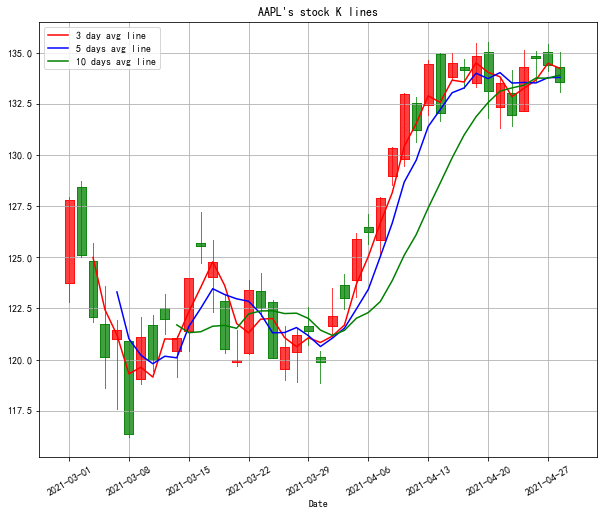

In [14]:
#The K graphs
#imports 
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ochl
from matplotlib.ticker import MultipleLocator
import yfinance as yf

yf.pdr_override()  #cover all the price as data
stock.drop(stock.index[len(stock)-1],inplace=True)  #get all the informs from your stock
stock.to_csv('D:\\Groupproject\\Stockdatas\\AAPL.csv')  #save the stock to our machine
df = pd.read_csv('D:/Groupproject/Stockdatas/AAPL.csv',encoding='gbk',index_col=0)  #read the file from the machine
fig, ax = plt.subplots(figsize=(10, 8))  #plt size
xmajorLocator   = MultipleLocator(5)  
ax.xaxis.set_major_locator(xmajorLocator)
candlestick2_ochl(ax = ax, opens=df["Open"].values,closes=df["Close"].values, highs=df["High"].values, lows=df["Low"].values,width=0.75, colorup='red', colordown='green')
#drawing for 3 avg lines in different color
df['Close'].rolling(window=3).mean().plot(color="red",label='3 day avg line')
df['Close'].rolling(window=5).mean().plot(color="blue",label='5 days avg line')
df['Close'].rolling(window=10).mean().plot(color="green",label='10 days avg line')
plt.legend(loc='best')     #draw the graph
ax.grid(True)     #grid line
plt.title("%1s's stock K lines"%code)  #title for the stock
plt.rcParams['font.sans-serif']=['SimHei']
plt.setp(plt.gca().get_xticklabels(), rotation=30) 
plt.show()

In [10]:
#using all the datas from close, high, low, open, volume, try to predict it in math ways.
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# getting data from the machine
sfilepath = 'D:\\Groupproject\\Stockdatas\\AAPL.csv'  #load your csv file in here
origDf = pd.read_csv(sfilepath,encoding='gbk')  #original Dataframe
df = origDf[['Close', 'High', 'Low','Open' ,'Volume']]  #Predicting Dataframe
featureData = df[['Open', 'High', 'Volume','Low']]  #Datas
#specifics the values
feature = featureData.values
target = np.array(df['Close'])  #our target is the close price

#using train method to train_test_split, split the csv datas into train set, and test set.
feature_train, feature_test, target_train ,target_test = train_test_split(feature,target,test_size=0.05)
pridectedDays = int(math.ceil(0.05 * len(origDf)))  # predict days
lrTool = LinearRegression()  
lrTool.fit(feature_train,target_train)
predictByTest = lrTool.predict(feature_test)  # Test in machine work

In [17]:
index=0

while index < len(origDf) - pridectedDays:  #try to use while loop to use the train_set predict price as the final price.
#     try:
        df.ix[index,'predictedVal']=origDf.ix[index,'Close']
        df.ix[index,'Date']=origDf.ix[index,'Date']
        index = index+1
# predictedCnt=0
#     except AttributeError:
#         print('AttributeError')
        
# while predictedCnt<pridectedDays:  #samething to predict the last 5% of the data
# #     try:
#         df.ix[index,'predictedVal']=predictByTest[predictedCnt]
#         df.ix[index,'Date']=origDf.ix[index,'Date']
#         predictedCnt=predictedCnt+1
#         index=index+1
# #     except AttributeError:
# #         print('AttributeError')

AttributeError: 'DataFrame' object has no attribute 'ix'

In [20]:
predictedCnt=0
while predictedCnt<pridectedDays:
#     try:
        df.ix[index,'predictedVal']=predictByTest[predictedCnt]
        df.ix[index,'Date']=origDf.ix[index,'Date']
        predictedCnt=predictedCnt+1
        index=index+1
#     except AttributeError:
#         print('AttributeError')

AttributeError: 'DataFrame' object has no attribute 'ix'

In [21]:
plt.figure()
df['predictedVal'].plot(color="red",label='predicted Data')
df['Close'].plot(color="blue",label='Real Data')
plt.legend(loc='best')  #draw
major_index=df.index[df.index%10==0]  #set x title
major_xtics=df['Date'][df.index%10==0]  #set x titl
plt.xticks(major_index,major_xtics)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.grid(linestyle='-.')
plt.show()  #the final version of the graph to predict the stock


KeyError: 'predictedVal'

<Figure size 432x288 with 0 Axes>